In [16]:
%matplotlib inline

import os
import json
import matplotlib
import numpy as np
import pandas as pd

In [17]:
epsList = ['0', '0.1', '0.2', '0.5', '1', '2', '4']
# TODO: CHANGE THIS AS WE ANALYZE MORE SAMPLES
numSamples = 10
correctList = []

df = pd.DataFrame(index=[str(i) for i in range(numSamples)])
for eps in epsList:
    jsonPath = "DP-Robustness/results/sample%d/pca_eps_%s_600_amortized.json" % (numSamples, eps)
    dfNew = pd.read_json(path_or_buf=jsonPath, orient='columns')
    df = df.join(other=dfNew, how='right')
    
    # Add a column to indicate which samples were classified correctly
    prefix = 'Eps %s' % eps
    colList = ['Adv%d %s Classification' % (i, prefix) for i in range(9)]
    df['%s Correct Classification' % prefix] = 45 - df[colList].sum(axis=1)
    df['%s Correct' % prefix] = (df['%s Correct Classification' % prefix] == df['Valid %s Classification' % prefix])
    correctList.append('%s Correct' % prefix)
df[correctList]

,Eps 0 Correct,Eps 0.1 Correct,Eps 0.2 Correct,Eps 0.5 Correct,Eps 1 Correct,Eps 2 Correct,Eps 4 Correct
0,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False
2,True,True,False,True,True,True,True
3,True,False,True,True,True,True,True
4,False,False,False,False,True,True,True
5,True,True,False,True,True,True,True
6,True,False,False,False,True,True,True
7,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False
9,False,True,True,True,False,False,False


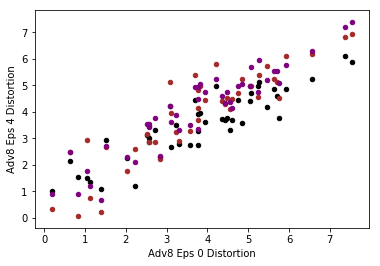

In [20]:
ax = None
colorMap = {'0.1': 'red', '0.2': 'blue', '0.5': 'green', '1': 'black', '2': 'brown', '4': 'purple'}

zeroPrefix = "Eps 0"
for eps in epsList:  
    if eps is '0':
        continue
    
    epsPrefix = "Eps %s" % eps
    for i in range(9):
        zeroLabel = "Adv%d %s Distortion" % (i, zeroPrefix)
        epsLabel = "Adv%d %s Distortion" % (i, epsPrefix)
        
        if ax is None:
            ax = df[df["%s Correct" % zeroPrefix] & df["%s Correct" % epsPrefix]].plot(kind='scatter', x=zeroLabel, y=epsLabel, c=colorMap[eps])
        else:
            df[df["%s Correct" % zeroPrefix] & df["%s Correct" % epsPrefix]].plot(kind='scatter', x=zeroLabel, y=epsLabel, c=colorMap[eps], ax=ax)